In [1]:
# Generate the road descriptor
from mnms.generation.roads import generate_manhattan_road

# generate a manhattan grid of roads 1x1 where each links has a length of 10000
roads = generate_manhattan_road(1, 10000)

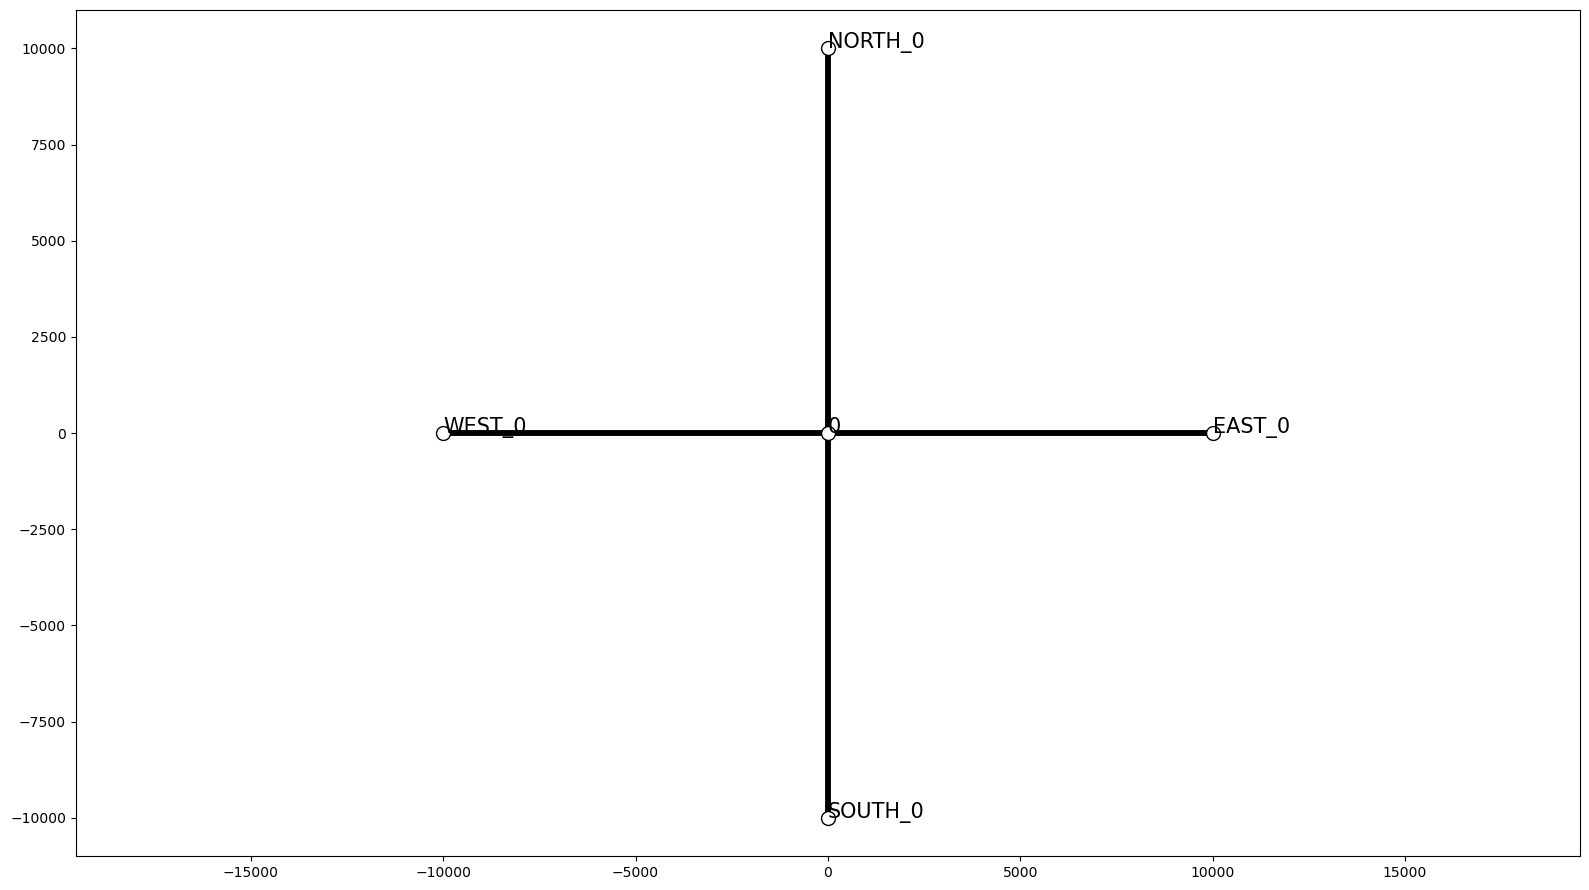

In [2]:
import matplotlib.pyplot as plt
from mnms.tools.render import draw_roads

fig, ax = plt.subplots(figsize=(16, 9))
draw_roads(ax, roads, linkwidth=4, nodesize=10, label_size=15)

In [3]:
import pprint
pprint.pprint(roads.sections)
pprint.pprint(roads.nodes)

{'0_EAST_0': RoadSection(id='0_EAST_0',
                         upstream='0',
                         downstream='EAST_0',
                         length=10000,
                         zone='RES'),
 '0_NORTH_0': RoadSection(id='0_NORTH_0',
                          upstream='0',
                          downstream='NORTH_0',
                          length=10000,
                          zone='RES'),
 '0_SOUTH_0': RoadSection(id='0_SOUTH_0',
                          upstream='0',
                          downstream='SOUTH_0',
                          length=10000,
                          zone='RES'),
 '0_WEST_0': RoadSection(id='0_WEST_0',
                         upstream='0',
                         downstream='WEST_0',
                         length=10000,
                         zone='RES'),
 'EAST_0_0': RoadSection(id='EAST_0_0',
                         upstream='EAST_0',
                         downstream='0',
                         length=10000,
              

In [4]:
# Create the personal car mobility service
# from mnms.mobility_service.personal_vehicle import PersonalMobilityService
# personal_car = PersonalMobilityService()

# from mnms.tools.observer import CSVVehicleObserver
# personal_car.attach_vehicle_observer(CSVVehicleObserver("PC.csv"))

# from mnms.graph.layers import CarLayer
# car_layer = CarLayer(road_descriptor, services=[personal_car])

# car_layer.create_node("CAR_0", "0")
# car_layer.create_node("CAR_1", "1")
# car_layer.create_link("CAR_0_1", "CAR_0", "CAR_1", {}, ["0_1"])

In [5]:
# Create the public transport mobility service
from mnms.mobility_service.public_transport import PublicTransportMobilityService
PT_service = PublicTransportMobilityService('PT')

from mnms.tools.observer import CSVVehicleObserver
PT_service.attach_vehicle_observer(CSVVehicleObserver("PT.csv"))

In [6]:
# Generate the layer for the public transport mobility service
from mnms.graph.layers import PublicTransportLayer
from mnms.vehicles.veh_type import Bus
PT_layer = PublicTransportLayer(roads, 'PT_layer', Bus, 20, services=[PT_service])

In [7]:
# Generate the public transport stops

roads.register_stop('NORTH_0_NS', 'NORTH_0_0', 0.)
roads.register_stop('NORTH_0_SN', '0_NORTH_0', 1)

roads.register_stop('SOUTH_0_SN', 'SOUTH_0_0', 0.)
roads.register_stop('SOUTH_0_NS', '0_SOUTH_0', 1)

roads.register_stop('EAST_0_EW', 'EAST_0_0', 0.)
roads.register_stop('EAST_0_WE', '0_EAST_0', 1)

roads.register_stop('WEST_0_WE', 'WEST_0_0', 0.)
roads.register_stop('WEST_0_EW', '0_WEST_0', 1)

roads.register_stop('0_NS', '0_SOUTH_0', 0.)
roads.register_stop('0_SN', '0_NORTH_0', 0.)
roads.register_stop('0_EW', '0_WEST_0', 0.)
roads.register_stop('0_WE', '0_EAST_0', 0.)

In [8]:
pprint.pprint(roads.stops)

{'0_EW': RoadStop(id='0_EW',
                  section='0_WEST_0',
                  relative_position=0.0,
                  absolute_position=array([0., 0.])),
 '0_NS': RoadStop(id='0_NS',
                  section='0_SOUTH_0',
                  relative_position=0.0,
                  absolute_position=array([0., 0.])),
 '0_SN': RoadStop(id='0_SN',
                  section='0_NORTH_0',
                  relative_position=0.0,
                  absolute_position=array([0., 0.])),
 '0_WE': RoadStop(id='0_WE',
                  section='0_EAST_0',
                  relative_position=0.0,
                  absolute_position=array([0., 0.])),
 'EAST_0_EW': RoadStop(id='EAST_0_EW',
                       section='EAST_0_0',
                       relative_position=0.0,
                       absolute_position=array([10000.,     0.])),
 'EAST_0_WE': RoadStop(id='EAST_0_WE',
                       section='0_EAST_0',
                       relative_position=1,
                       absolu

In [9]:
from mnms.time import TimeTable, Dt, Time
PT_layer.create_line('NS',
                    ['NORTH_0_NS', '0_NS', 'SOUTH_0_NS'],
                    [['NORTH_0_0'],['0_SOUTH_0']],
                    TimeTable.create_table_freq('07:00:00', '08:00:00', Dt(minutes=5)))

PT_layer.create_line('SN',
                    ['SOUTH_0_SN', '0_SN', 'NORTH_0_SN'],
                    [['SOUTH_0_0'],['0_NORTH_0']],
                    TimeTable.create_table_freq('07:00:00', '08:00:00', Dt(minutes=5)))

PT_layer.create_line('EW',
                    ['EAST_0_EW', '0_EW', 'WEST_0_EW'],
                    [['EAST_0_0'],['0_WEST_0']],
                    TimeTable.create_table_freq('07:00:00', '08:00:00', Dt(minutes=5)))

PT_layer.create_line('WE',
                    ['WEST_0_WE', '0_WE', 'EAST_0_WE'],
                    [['WEST_0_0'],['0_EAST_0']],
                    TimeTable.create_table_freq('07:00:00', '08:00:00', Dt(minutes=5)))

# To do: try various frequencies to understand the cost

In [10]:
# Generate the od layer
from mnms.generation.layers import generate_matching_origin_destination_layer
od_layer = generate_matching_origin_destination_layer(roads)

In [11]:
# Generate the multilayer graph
from mnms.graph.layers import MultiLayerGraph
ml_graph = MultiLayerGraph([PT_layer],od_layer,200)

In [12]:
pprint.pprint(ml_graph.graph.nodes)

{'DESTINATION_0': <hipop.cpp.graph.Node object at 0x7fa3414d32f0>,
 'DESTINATION_0_EW': <hipop.cpp.graph.Node object at 0x7fa3414d2ef0>,
 'DESTINATION_0_NS': <hipop.cpp.graph.Node object at 0x7fa3312738b0>,
 'DESTINATION_0_SN': <hipop.cpp.graph.Node object at 0x7fa3414db830>,
 'DESTINATION_0_WE': <hipop.cpp.graph.Node object at 0x7fa3414db8f0>,
 'DESTINATION_EAST_0': <hipop.cpp.graph.Node object at 0x7fa3414d8770>,
 'DESTINATION_EAST_0_EW': <hipop.cpp.graph.Node object at 0x7fa3414d8270>,
 'DESTINATION_EAST_0_WE': <hipop.cpp.graph.Node object at 0x7fa3414d2bb0>,
 'DESTINATION_NORTH_0': <hipop.cpp.graph.Node object at 0x7fa3414db070>,
 'DESTINATION_NORTH_0_NS': <hipop.cpp.graph.Node object at 0x7fa3414d1d70>,
 'DESTINATION_NORTH_0_SN': <hipop.cpp.graph.Node object at 0x7fa3414ec7b0>,
 'DESTINATION_SOUTH_0': <hipop.cpp.graph.Node object at 0x7fa3414d3af0>,
 'DESTINATION_SOUTH_0_NS': <hipop.cpp.graph.Node object at 0x7fa3414d31b0>,
 'DESTINATION_SOUTH_0_SN': <hipop.cpp.graph.Node object a

In [13]:
ml_graph.connect_layers("TL_NW", "NS_0_NS", "EW_0_EW", 1, {})
ml_graph.connect_layers("TL_NE", "NS_0_NS", "WE_0_WE", 1, {})
ml_graph.connect_layers("TL_SW", "SN_0_SN", "EW_0_EW", 1, {})
ml_graph.connect_layers("TL_SE", "SN_0_SN", "WE_0_WE", 1, {})
ml_graph.connect_layers("TL_ES", "EW_0_EW", "NS_0_NS", 1, {})
ml_graph.connect_layers("TL_EN", "EW_0_EW", "SN_0_SN", 1, {})
ml_graph.connect_layers("TL_WS", "WE_0_WE", "NS_0_NS", 1, {})
ml_graph.connect_layers("TL_WN", "WE_0_WE", "SN_0_SN", 1, {})

In [14]:
# Decison Model
from mnms.travel_decision.dummy import DummyDecisionModel
decision_model = DummyDecisionModel(ml_graph, outfile="path.csv")

In [15]:
# Demand
from mnms.demand import BaseDemandManager, User
from mnms.tools.observer import CSVUserObserver

users=[]
# N -> S
users.append(User("U0", [0, 10000], [0, -10000], Time("07:00:00")))
# E -> Zero
users.append(User("U1", [10000, 0], [0, 0], Time("07:02:00")))
# N -> W
users.append(User("U2", [0, 10000], [-10000, 0], Time("07:04:00")))

demand = BaseDemandManager(users)
demand.add_user_observer(CSVUserObserver('user.csv'))

In [16]:
# Flow Motor
def mfdspeed(dacc):
    dspeed = {'BUS': 20}
    return dspeed

from mnms.flow.MFD import MFDFlowMotor, Reservoir
flow_motor = MFDFlowMotor()
flow_motor.add_reservoir(Reservoir(roads.zones["RES"], ['BUS'], mfdspeed))
# To do: understand the mode

In [17]:
# Supervisor
from mnms.simulation import Supervisor
supervisor = Supervisor(ml_graph,
                        demand,
                        flow_motor,
                        decision_model)

In [18]:
# Simulation
supervisor.run(Time("07:00:00"),
               Time("07:10:00"),
               Dt(seconds=1),
               10)

Run |■■■■■■■■■■■■■■■■■■■■| 100 % | remain ~ 0 s
